In [14]:
import numpy as np
import matplotlib.pyplot as plt


from hnc import  HNC_solver
from qsps import *


# Two Species

Here we do QSP interactions between electrons and one ion type. 

Using $\tilde{r}\equiv r/r_s$, we implement potentials 
\begin{align}
\beta v_{ee}(\tilde{r}) &=  \frac{\Gamma_{ee}}{\tilde{r}}\left( 1- \exp[-\tilde{r} r_s/\Lambda_e]\right) +  \ln2 \exp\left[-\tilde{r}^2 r_s^2/(\pi \Lambda_e^2 \ln 2)\right]\\
\beta v_{ei}(\tilde{r}) &=  \frac{\Gamma_{ei}}{\tilde{r}}\left( 1- \exp[-\tilde{r} r_s/\Lambda_e]\right)\\
\beta v_{ii}(\tilde{r}) &=  \frac{\Gamma_{ii}}{\tilde{r}}
\end{align}
For  
\begin{align}
\Gamma_{ee}&=\frac{\beta e^2}{r_s}\\
\Gamma_{ei}&=\frac{\beta Z_i e^2}{r_s}\\
\Gamma_{ii}&=\frac{\beta Z_i^2 e^2}{r_s}\\
\end{align}

Plug into get potentials

In [15]:
# ri = QSP_HNC.rs_from_n(6.03e30*aB**3)
ri = 0.4473#qsp.rs_from_n(1.8e31*aB**3)
Te = 0.34*eV 
Ti   = 0.34*eV 
Z, A = 1, 1
Zstar= 1

qsp = QSP_HNC(Z, A, Zstar, Te, Ti, ri)


Λee = 0.491
Λei = 0.347
Γii=178.917, Γie=-0.338, Γee=0.338 
r_i=0.447
r_e=0.447
θ  =1.36e-03


First, we initialize the hnc

In [3]:
N_species = 2
Gamma = np.array(  [[qsp.Γii,  qsp.Γei],
                    [qsp.Γei,  qsp.Γee]])


names = ["Ion-1", "Electron", ] 
kappa = 1
rho = np.array([  3/(4*np.pi), Zstar*3/(4*np.pi) ])
hnc2 = HNC_solver(N_species, Gamma=Gamma, kappa=kappa, tol=1e-8,
                 kappa_multiscale=1, rho = rho, num_iterations=int(1e0), 
                 R_max=5, N_bins=2000, names=names, dst_type=3)


In [4]:
βu_r_matrix = np.array([[qsp.βvii(hnc2.r_array), qsp.βvei(hnc2.r_array)],
                        [qsp.βvei(hnc2.r_array), qsp.βvee(hnc2.r_array)]])

hnc2.set_βu_matrix(βu_r_matrix)
# hnc2.initialize_guess()
hnc2.initialize_c_k()
hnc2.set_C_matrix()

In [5]:
hnc2.num_iterations=1e3
hnc2.HNC_solve(alpha_method='best', alpha_Picard = 1e-1, alpha_oz = 1e-4, h_max=1e4)


 HNC min: [0.5] True Optimization terminated successfully.
0: Err in c_r: 4.52e+02, OZ: 1.37e-01, HNC: 1.14e-02
 HNC min: [0.5] True Optimization terminated successfully.
1: Err in c_r: 2.43e+02, OZ: 1.30e-01, HNC: 5.67e-03
 HNC min: [0.5] True Optimization terminated successfully.
2: Err in c_r: 1.31e+02, OZ: 1.24e-01, HNC: 9.80e-03
 HNC min: [0.5] True Optimization terminated successfully.
3: Err in c_r: 7.18e+01, OZ: 1.17e-01, HNC: 2.72e-01
 HNC min: [0.5] True Optimization terminated successfully.
4: Err in c_r: 4.05e+01, OZ: 1.10e-01, HNC: 3.05e+00
 HNC min: [0.5] True Optimization terminated successfully.
5: Err in c_r: 2.39e+01, OZ: 1.06e-01, HNC: 3.11e+00
 HNC min: [0.5] True Optimization terminated successfully.
6: Err in c_r: 1.51e+01, OZ: 1.02e-01, HNC: 9.15e+00
 HNC min: [0.5] True Optimization terminated successfully.
7: Err in c_r: 1.03e+01, OZ: 9.97e-02, HNC: 4.68e+00
 HNC min: [0.5] True Optimization terminated successfully.
8: Err in c_r: 7.61e+00, OZ: 9.62e-02, HNC: 1

 HNC min: [0.5] True Optimization terminated successfully.
75: Err in c_r: 2.45e-01, OZ: 9.92e-02, HNC: 1.12e-02
 HNC min: [0.5] True Optimization terminated successfully.
76: Err in c_r: 2.39e-01, OZ: 9.95e-02, HNC: 1.08e-02
 HNC min: [0.5] True Optimization terminated successfully.
77: Err in c_r: 2.34e-01, OZ: 9.98e-02, HNC: 1.05e-02
 HNC min: [0.5] True Optimization terminated successfully.
78: Err in c_r: 2.28e-01, OZ: 1.00e-01, HNC: 1.01e-02
 HNC min: [0.5] True Optimization terminated successfully.
79: Err in c_r: 2.23e-01, OZ: 1.00e-01, HNC: 9.78e-03
 HNC min: [0.5] True Optimization terminated successfully.
80: Err in c_r: 2.18e-01, OZ: 1.01e-01, HNC: 9.46e-03
 HNC min: [0.5] True Optimization terminated successfully.
81: Err in c_r: 2.13e-01, OZ: 1.01e-01, HNC: 9.15e-03
 HNC min: [0.5] True Optimization terminated successfully.
82: Err in c_r: 2.09e-01, OZ: 1.01e-01, HNC: 8.85e-03
 HNC min: [0.5] True Optimization terminated successfully.
83: Err in c_r: 2.04e-01, OZ: 1.02e-0

 HNC min: [0.5] True Optimization terminated successfully.
150: Err in c_r: 5.96e-02, OZ: 1.19e-01, HNC: 1.59e-03
 HNC min: [0.5] True Optimization terminated successfully.
151: Err in c_r: 5.87e-02, OZ: 1.20e-01, HNC: 1.56e-03
 HNC min: [0.5] True Optimization terminated successfully.
152: Err in c_r: 5.78e-02, OZ: 1.20e-01, HNC: 1.53e-03
 HNC min: [0.5] True Optimization terminated successfully.
153: Err in c_r: 5.69e-02, OZ: 1.20e-01, HNC: 1.50e-03
 HNC min: [0.5] True Optimization terminated successfully.
154: Err in c_r: 5.60e-02, OZ: 1.20e-01, HNC: 1.48e-03
 HNC min: [0.5] True Optimization terminated successfully.
155: Err in c_r: 5.52e-02, OZ: 1.20e-01, HNC: 1.45e-03
 HNC min: [0.5] True Optimization terminated successfully.
156: Err in c_r: 5.43e-02, OZ: 1.20e-01, HNC: 1.43e-03
 HNC min: [0.5] True Optimization terminated successfully.
157: Err in c_r: 5.35e-02, OZ: 1.20e-01, HNC: 1.40e-03
 HNC min: [0.5] True Optimization terminated successfully.
158: Err in c_r: 5.26e-02, OZ

 HNC min: [0.5] True Optimization terminated successfully.
223: Err in c_r: 1.78e-02, OZ: 1.26e-01, HNC: 4.88e-04
 HNC min: [0.5] True Optimization terminated successfully.
224: Err in c_r: 1.75e-02, OZ: 1.26e-01, HNC: 4.80e-04
 HNC min: [0.5] True Optimization terminated successfully.
225: Err in c_r: 1.72e-02, OZ: 1.26e-01, HNC: 4.72e-04
 HNC min: [0.5] True Optimization terminated successfully.
226: Err in c_r: 1.70e-02, OZ: 1.26e-01, HNC: 4.64e-04
 HNC min: [0.5] True Optimization terminated successfully.
227: Err in c_r: 1.67e-02, OZ: 1.26e-01, HNC: 4.56e-04
 HNC min: [0.5] True Optimization terminated successfully.
228: Err in c_r: 1.64e-02, OZ: 1.26e-01, HNC: 4.48e-04
 HNC min: [0.5] True Optimization terminated successfully.
229: Err in c_r: 1.61e-02, OZ: 1.26e-01, HNC: 4.40e-04
 HNC min: [0.5] True Optimization terminated successfully.
230: Err in c_r: 1.59e-02, OZ: 1.26e-01, HNC: 4.32e-04
 HNC min: [0.5] True Optimization terminated successfully.
231: Err in c_r: 1.56e-02, OZ

 HNC min: [0.5] True Optimization terminated successfully.
297: Err in c_r: 5.44e-03, OZ: 1.30e-01, HNC: 1.40e-04
 HNC min: [0.5] True Optimization terminated successfully.
298: Err in c_r: 5.36e-03, OZ: 1.30e-01, HNC: 1.38e-04
 HNC min: [0.5] True Optimization terminated successfully.
299: Err in c_r: 5.27e-03, OZ: 1.30e-01, HNC: 1.36e-04
 HNC min: [0.5] True Optimization terminated successfully.
300: Err in c_r: 5.19e-03, OZ: 1.30e-01, HNC: 1.34e-04
 HNC min: [0.5] True Optimization terminated successfully.
301: Err in c_r: 5.12e-03, OZ: 1.30e-01, HNC: 1.32e-04
 HNC min: [0.5] True Optimization terminated successfully.
302: Err in c_r: 5.04e-03, OZ: 1.30e-01, HNC: 1.30e-04
 HNC min: [0.5] True Optimization terminated successfully.
303: Err in c_r: 4.96e-03, OZ: 1.30e-01, HNC: 1.28e-04
 HNC min: [0.5] True Optimization terminated successfully.
304: Err in c_r: 4.89e-03, OZ: 1.30e-01, HNC: 1.26e-04
 HNC min: [0.5] True Optimization terminated successfully.
305: Err in c_r: 4.81e-03, OZ

 HNC min: [0.5] True Optimization terminated successfully.
370: Err in c_r: 1.83e-03, OZ: 1.32e-01, HNC: 4.57e-05
 HNC min: [0.5] True Optimization terminated successfully.
371: Err in c_r: 1.80e-03, OZ: 1.32e-01, HNC: 4.51e-05
 HNC min: [0.5] True Optimization terminated successfully.
372: Err in c_r: 1.78e-03, OZ: 1.32e-01, HNC: 4.44e-05
 HNC min: [0.5] True Optimization terminated successfully.
373: Err in c_r: 1.75e-03, OZ: 1.32e-01, HNC: 4.37e-05
 HNC min: [0.5] True Optimization terminated successfully.
374: Err in c_r: 1.73e-03, OZ: 1.32e-01, HNC: 4.31e-05
 HNC min: [0.5] True Optimization terminated successfully.
375: Err in c_r: 1.70e-03, OZ: 1.32e-01, HNC: 4.25e-05
 HNC min: [0.5] True Optimization terminated successfully.
376: Err in c_r: 1.68e-03, OZ: 1.32e-01, HNC: 4.18e-05
 HNC min: [0.5] True Optimization terminated successfully.
377: Err in c_r: 1.65e-03, OZ: 1.32e-01, HNC: 4.12e-05
 HNC min: [0.5] True Optimization terminated successfully.
378: Err in c_r: 1.63e-03, OZ

 HNC min: [0.5] True Optimization terminated successfully.
443: Err in c_r: 6.35e-04, OZ: 1.32e-01, HNC: 1.57e-05
 HNC min: [0.5] True Optimization terminated successfully.
444: Err in c_r: 6.26e-04, OZ: 1.32e-01, HNC: 1.55e-05
 HNC min: [0.5] True Optimization terminated successfully.
445: Err in c_r: 6.17e-04, OZ: 1.32e-01, HNC: 1.52e-05
 HNC min: [0.5] True Optimization terminated successfully.
446: Err in c_r: 6.09e-04, OZ: 1.32e-01, HNC: 1.50e-05
 HNC min: [0.5] True Optimization terminated successfully.
447: Err in c_r: 6.00e-04, OZ: 1.32e-01, HNC: 1.48e-05
 HNC min: [0.5] True Optimization terminated successfully.
448: Err in c_r: 5.91e-04, OZ: 1.32e-01, HNC: 1.46e-05
 HNC min: [0.5] True Optimization terminated successfully.
449: Err in c_r: 5.83e-04, OZ: 1.32e-01, HNC: 1.44e-05
 HNC min: [0.5] True Optimization terminated successfully.
450: Err in c_r: 5.75e-04, OZ: 1.32e-01, HNC: 1.42e-05
 HNC min: [0.5] True Optimization terminated successfully.
451: Err in c_r: 5.66e-04, OZ

 HNC min: [0.5] True Optimization terminated successfully.
515: Err in c_r: 2.26e-04, OZ: 1.33e-01, HNC: 5.56e-06
 HNC min: [0.5] True Optimization terminated successfully.
516: Err in c_r: 2.23e-04, OZ: 1.33e-01, HNC: 5.48e-06
 HNC min: [0.5] True Optimization terminated successfully.
517: Err in c_r: 2.20e-04, OZ: 1.33e-01, HNC: 5.40e-06
 HNC min: [0.5] True Optimization terminated successfully.
518: Err in c_r: 2.17e-04, OZ: 1.33e-01, HNC: 5.33e-06
 HNC min: [0.5] True Optimization terminated successfully.
519: Err in c_r: 2.14e-04, OZ: 1.33e-01, HNC: 5.25e-06
 HNC min: [0.5] True Optimization terminated successfully.
520: Err in c_r: 2.11e-04, OZ: 1.33e-01, HNC: 5.18e-06
 HNC min: [0.5] True Optimization terminated successfully.
521: Err in c_r: 2.08e-04, OZ: 1.33e-01, HNC: 5.10e-06
 HNC min: [0.5] True Optimization terminated successfully.
522: Err in c_r: 2.05e-04, OZ: 1.33e-01, HNC: 5.03e-06
 HNC min: [0.5] True Optimization terminated successfully.
523: Err in c_r: 2.02e-04, OZ

 HNC min: [0.5] True Optimization terminated successfully.
587: Err in c_r: 8.08e-05, OZ: 1.33e-01, HNC: 1.98e-06
 HNC min: [0.5] True Optimization terminated successfully.
588: Err in c_r: 7.97e-05, OZ: 1.33e-01, HNC: 1.96e-06
 HNC min: [0.5] True Optimization terminated successfully.
589: Err in c_r: 7.86e-05, OZ: 1.33e-01, HNC: 1.93e-06
 HNC min: [0.5] True Optimization terminated successfully.
590: Err in c_r: 7.75e-05, OZ: 1.33e-01, HNC: 1.90e-06
 HNC min: [0.5] True Optimization terminated successfully.
591: Err in c_r: 7.64e-05, OZ: 1.33e-01, HNC: 1.87e-06
 HNC min: [0.5] True Optimization terminated successfully.
592: Err in c_r: 7.53e-05, OZ: 1.33e-01, HNC: 1.85e-06
 HNC min: [0.5] True Optimization terminated successfully.
593: Err in c_r: 7.42e-05, OZ: 1.33e-01, HNC: 1.82e-06
 HNC min: [0.5] True Optimization terminated successfully.
594: Err in c_r: 7.32e-05, OZ: 1.33e-01, HNC: 1.80e-06
 HNC min: [0.5] True Optimization terminated successfully.
595: Err in c_r: 7.21e-05, OZ

 HNC min: [0.5] True Optimization terminated successfully.
660: Err in c_r: 2.85e-05, OZ: 1.33e-01, HNC: 7.00e-07
 HNC min: [0.5] True Optimization terminated successfully.
661: Err in c_r: 2.81e-05, OZ: 1.33e-01, HNC: 6.90e-07
 HNC min: [0.5] True Optimization terminated successfully.
662: Err in c_r: 2.77e-05, OZ: 1.33e-01, HNC: 6.80e-07
 HNC min: [0.5] True Optimization terminated successfully.
663: Err in c_r: 2.73e-05, OZ: 1.33e-01, HNC: 6.70e-07
 HNC min: [0.5] True Optimization terminated successfully.
664: Err in c_r: 2.69e-05, OZ: 1.33e-01, HNC: 6.61e-07
 HNC min: [0.5] True Optimization terminated successfully.
665: Err in c_r: 2.66e-05, OZ: 1.33e-01, HNC: 6.51e-07
 HNC min: [0.5] True Optimization terminated successfully.
666: Err in c_r: 2.62e-05, OZ: 1.33e-01, HNC: 6.42e-07
 HNC min: [0.5] True Optimization terminated successfully.
667: Err in c_r: 2.58e-05, OZ: 1.33e-01, HNC: 6.33e-07
 HNC min: [0.5] True Optimization terminated successfully.
668: Err in c_r: 2.54e-05, OZ

 HNC min: [0.5] True Optimization terminated successfully.
734: Err in c_r: 9.92e-06, OZ: 1.33e-01, HNC: 2.43e-07
 HNC min: [0.5] True Optimization terminated successfully.
735: Err in c_r: 9.78e-06, OZ: 1.33e-01, HNC: 2.40e-07
 HNC min: [0.5] True Optimization terminated successfully.
736: Err in c_r: 9.64e-06, OZ: 1.33e-01, HNC: 2.36e-07
 HNC min: [0.5] True Optimization terminated successfully.
737: Err in c_r: 9.51e-06, OZ: 1.33e-01, HNC: 2.33e-07
 HNC min: [0.5] True Optimization terminated successfully.
738: Err in c_r: 9.37e-06, OZ: 1.33e-01, HNC: 2.30e-07
 HNC min: [0.5] True Optimization terminated successfully.
739: Err in c_r: 9.24e-06, OZ: 1.33e-01, HNC: 2.27e-07
 HNC min: [0.5] True Optimization terminated successfully.
740: Err in c_r: 9.11e-06, OZ: 1.33e-01, HNC: 2.23e-07
 HNC min: [0.5] True Optimization terminated successfully.
741: Err in c_r: 8.98e-06, OZ: 1.33e-01, HNC: 2.20e-07
 HNC min: [0.5] True Optimization terminated successfully.
742: Err in c_r: 8.85e-06, OZ

 HNC min: [0.5] True Optimization terminated successfully.
808: Err in c_r: 3.45e-06, OZ: 1.33e-01, HNC: 8.47e-08
 HNC min: [0.5] True Optimization terminated successfully.
809: Err in c_r: 3.40e-06, OZ: 1.33e-01, HNC: 8.35e-08
 HNC min: [0.5] True Optimization terminated successfully.
810: Err in c_r: 3.36e-06, OZ: 1.33e-01, HNC: 8.23e-08
 HNC min: [0.5] True Optimization terminated successfully.
811: Err in c_r: 3.31e-06, OZ: 1.33e-01, HNC: 8.11e-08
 HNC min: [0.5] True Optimization terminated successfully.
812: Err in c_r: 3.26e-06, OZ: 1.33e-01, HNC: 8.00e-08
 HNC min: [0.5] True Optimization terminated successfully.
813: Err in c_r: 3.21e-06, OZ: 1.33e-01, HNC: 7.88e-08
 HNC min: [0.5] True Optimization terminated successfully.
814: Err in c_r: 3.17e-06, OZ: 1.33e-01, HNC: 7.77e-08
 HNC min: [0.5] True Optimization terminated successfully.
815: Err in c_r: 3.12e-06, OZ: 1.33e-01, HNC: 7.66e-08
 HNC min: [0.5] True Optimization terminated successfully.
816: Err in c_r: 3.08e-06, OZ

 HNC min: [0.5] True Optimization terminated successfully.
883: Err in c_r: 1.18e-06, OZ: 1.33e-01, HNC: 2.90e-08
 HNC min: [0.5] True Optimization terminated successfully.
884: Err in c_r: 1.17e-06, OZ: 1.33e-01, HNC: 2.86e-08
 HNC min: [0.5] True Optimization terminated successfully.
885: Err in c_r: 1.15e-06, OZ: 1.33e-01, HNC: 2.82e-08
 HNC min: [0.5] True Optimization terminated successfully.
886: Err in c_r: 1.13e-06, OZ: 1.33e-01, HNC: 2.78e-08
 HNC min: [0.5] True Optimization terminated successfully.
887: Err in c_r: 1.12e-06, OZ: 1.33e-01, HNC: 2.74e-08
 HNC min: [0.5] True Optimization terminated successfully.
888: Err in c_r: 1.10e-06, OZ: 1.33e-01, HNC: 2.70e-08
 HNC min: [0.5] True Optimization terminated successfully.
889: Err in c_r: 1.09e-06, OZ: 1.33e-01, HNC: 2.67e-08
 HNC min: [0.5] True Optimization terminated successfully.
890: Err in c_r: 1.07e-06, OZ: 1.33e-01, HNC: 2.63e-08
 HNC min: [0.5] True Optimization terminated successfully.
891: Err in c_r: 1.06e-06, OZ

 HNC min: [0.5] True Optimization terminated successfully.
957: Err in c_r: 4.12e-07, OZ: 1.33e-01, HNC: 1.01e-08
 HNC min: [0.5] True Optimization terminated successfully.
958: Err in c_r: 4.06e-07, OZ: 1.33e-01, HNC: 9.97e-09
 HNC min: [0.5] True Optimization terminated successfully.
959: Err in c_r: 4.01e-07, OZ: 1.33e-01, HNC: 9.82e-09
 HNC min: [0.5] True Optimization terminated successfully.
960: Err in c_r: 3.95e-07, OZ: 1.33e-01, HNC: 9.69e-09
 HNC min: [0.5] True Optimization terminated successfully.
961: Err in c_r: 3.89e-07, OZ: 1.33e-01, HNC: 9.55e-09
 HNC min: [0.5] True Optimization terminated successfully.
962: Err in c_r: 3.84e-07, OZ: 1.33e-01, HNC: 9.41e-09
 HNC min: [0.5] True Optimization terminated successfully.
963: Err in c_r: 3.78e-07, OZ: 1.33e-01, HNC: 9.28e-09
 HNC min: [0.5] True Optimization terminated successfully.
964: Err in c_r: 3.73e-07, OZ: 1.33e-01, HNC: 9.15e-09
 HNC min: [0.5] True Optimization terminated successfully.
965: Err in c_r: 3.68e-07, OZ

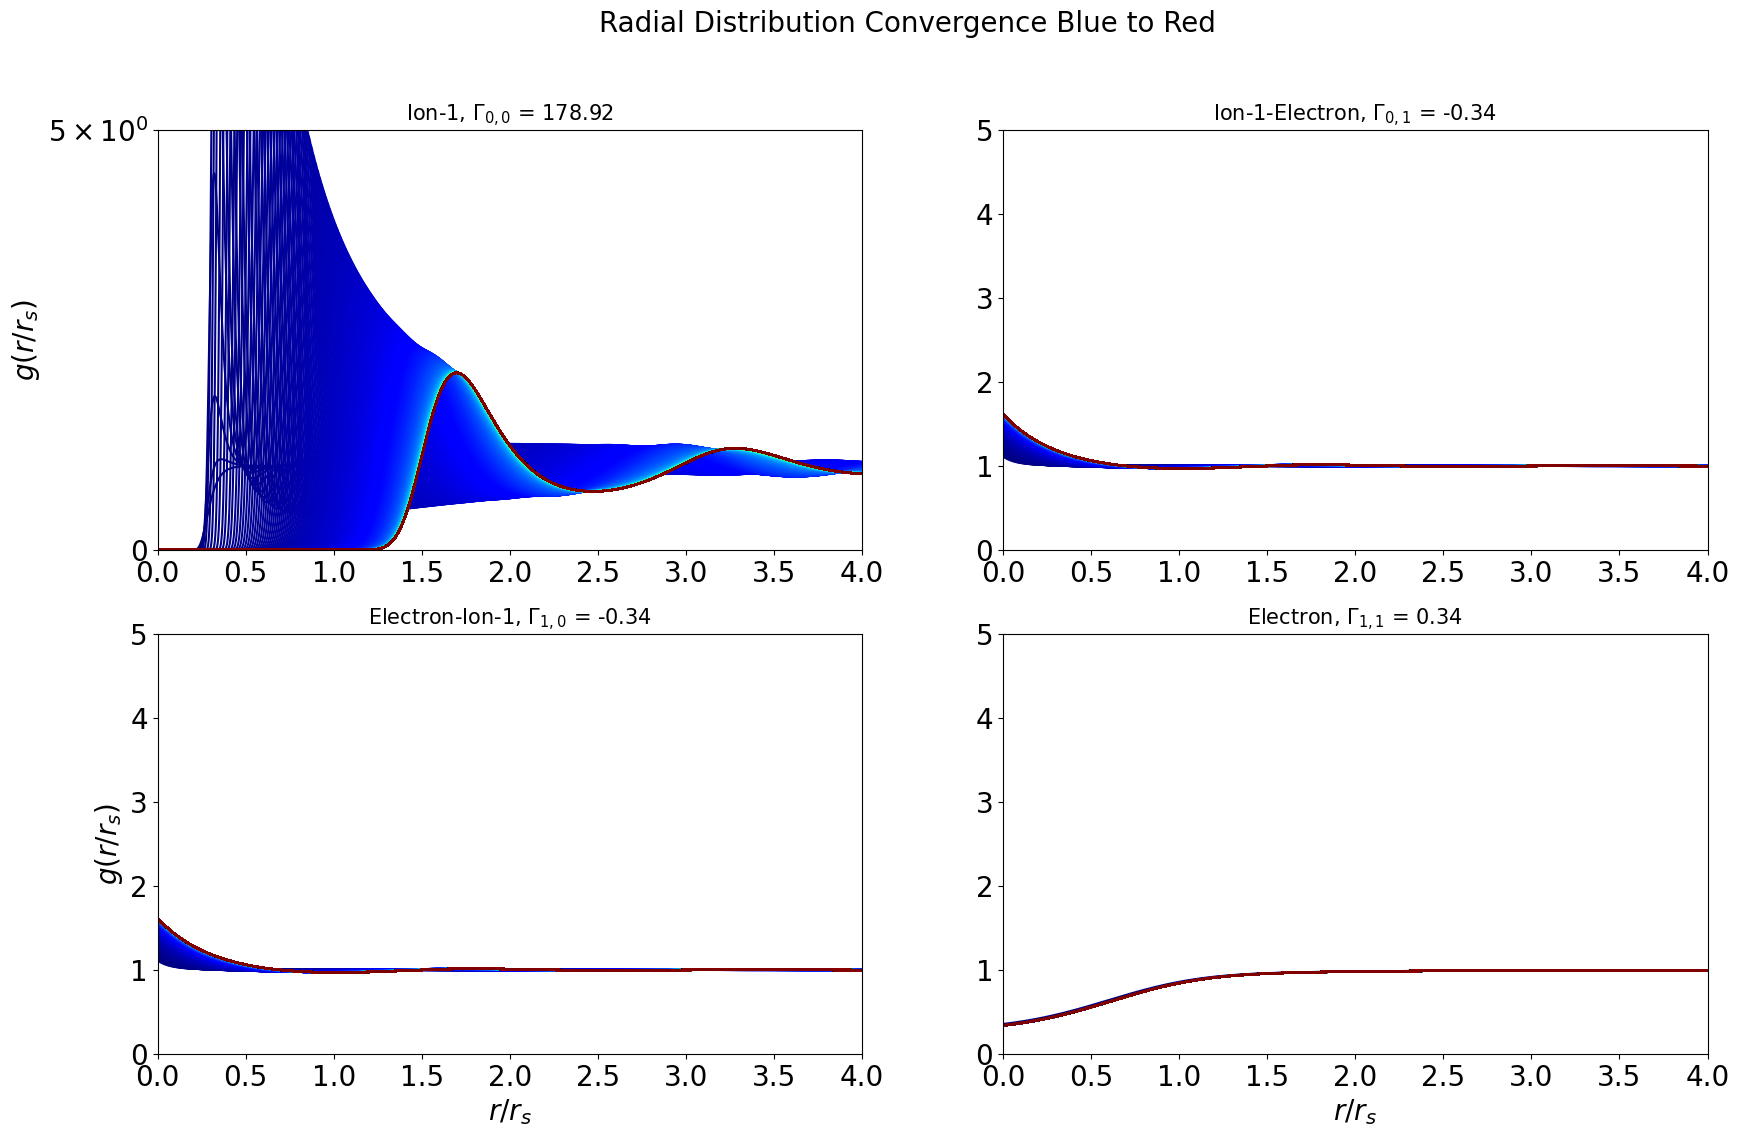

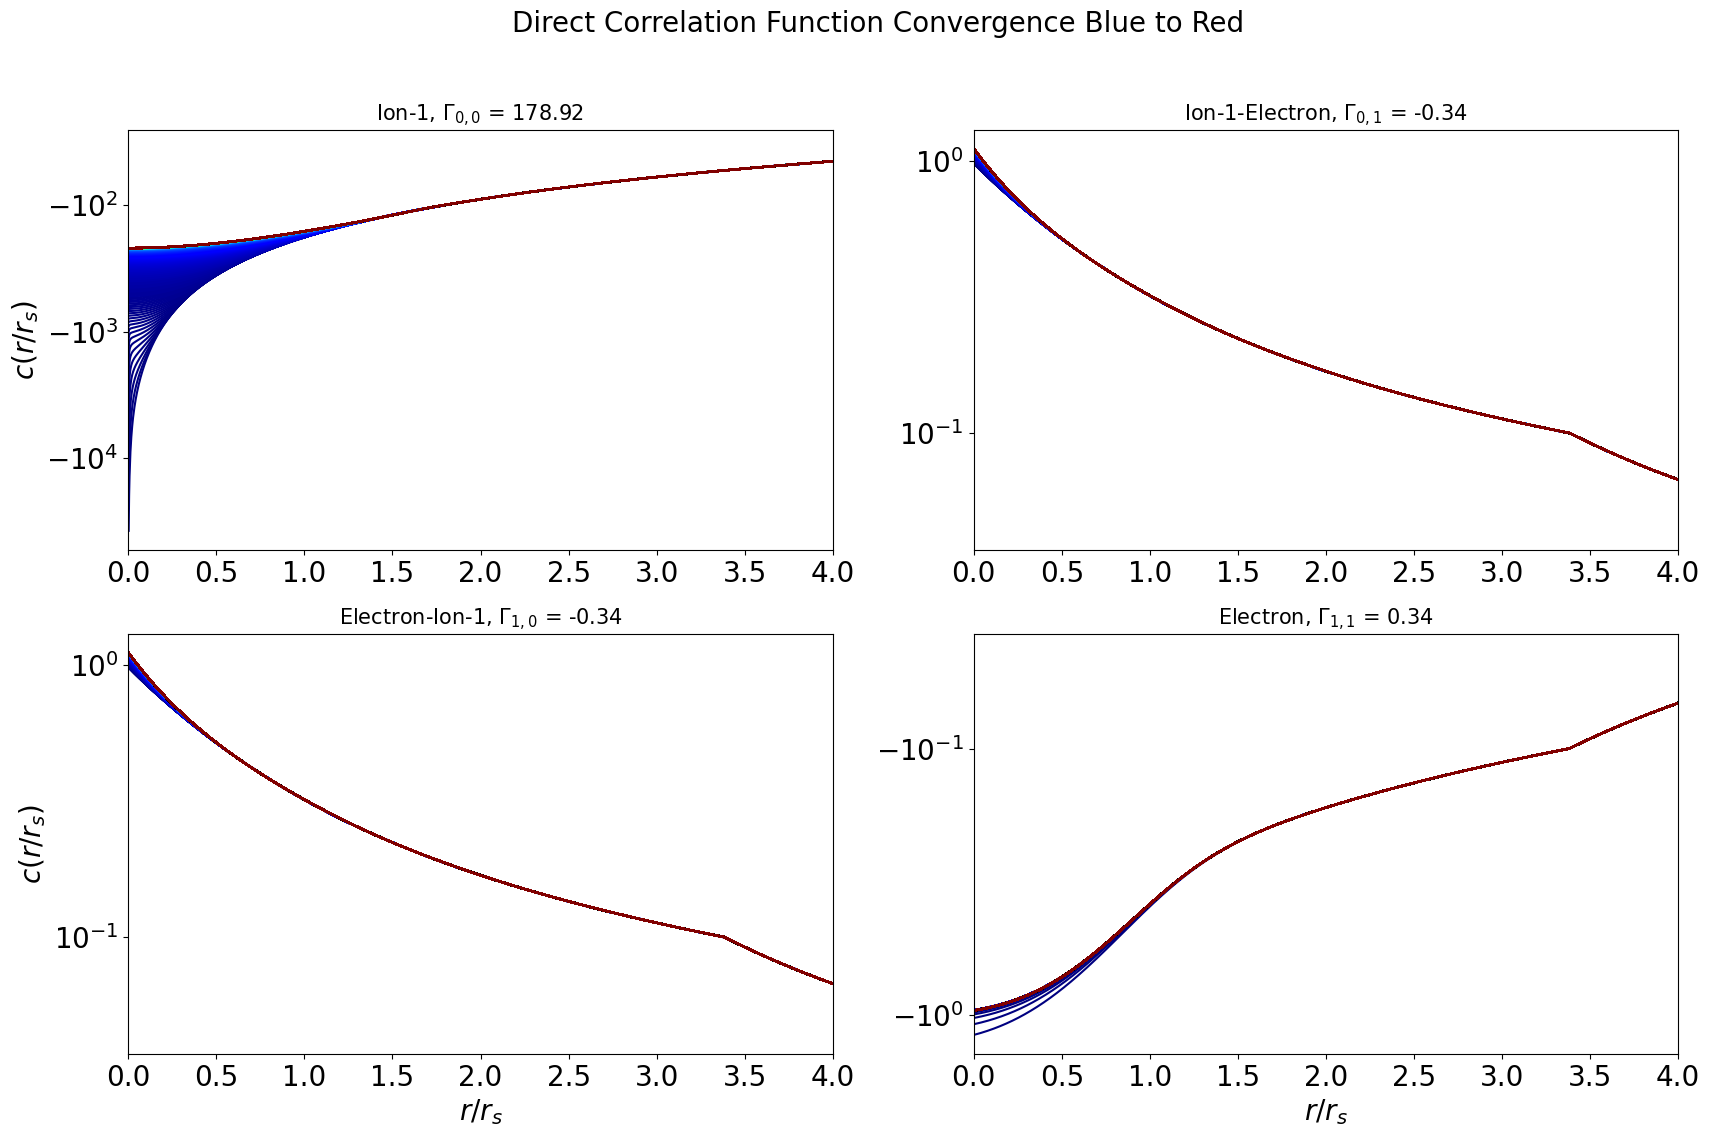

In [6]:
hnc2.plot_species_convergence_g(n_slices= int(len(hnc2.h_list)/1)  )
hnc2.plot_species_convergence_c(n_slices= int(len(hnc2.h_list)/1)  )

In [7]:
# DW_gii_CHNC_data = np.array([[0.37124463519313305, 0.01031636863823],
# [0.5278969957081545, 0.010316368638239],
# [0.6094420600858369, 0.151306740027510],
# [0.6587982832618026, 0.808115543328748],
# [0.7145922746781116, 1.863823933975240],
# [0.7360515021459227, 2.063273727647868], 
# [0.759656652360515, 2.1354883081155434], 
# [0.7832618025751072, 2.101100412654745],
# [0.8304721030042919, 1.740027510316368],
# [0.8969957081545065, 1.227647867950481],
# [0.9742489270386266, 0.863136176066024],
# [1.053648068669528, 0.7049518569463549],
# [1.148068669527897, 0.7118294360385145],
# [1.238197424892704, 0.8253094910591472],
# [1.3433476394849786, 1.076341127922971],
# [1.4313304721030042, 1.217331499312242],
# [1.4935622317596566, 1.217331499312242],
# [1.5858369098712446, 1.072902338376891],
# [1.684549356223176, 0.9387895460797798],
# [1.8047210300429184, 0.890646492434663],
# [1.9227467811158798, 0.962861072902338],
# [2.0579399141630903, 1.052269601100412],
# [2.1759656652360513, 1.066024759284731],
# [2.278969957081545, 1.0213204951856947]])
# DW_gii_CHNC_data[:,0]=DW_gii_CHNC_data[:,0]/qsp.ri

# DW_gei_CHNC_data = np.array([[-0.002145922746781116, 1.812242090784044],
# [0.1072961373390558, 1.3651994497936726],
# [0.2167381974248927, 1.1210453920220083],
# [0.3197424892703863, 1.000687757909216],
# [0.4291845493562232, 0.9697386519944979],
# [0.5343347639484979, 0.9628610729023384],
# [0.648068669527897, 1.000687757909216],
# [0.7639484978540773, 1.028198074277854],
# [0.8562231759656652, 1.031636863823934],
# [0.9699570815450643, 1.0110041265474552],
# [1.0729613733905579, 0.9938101788170564],
# [1.1802575107296138, 0.9938101788170564],
# [1.3927038626609443, 1.0075653370013755],
# [1.5107296137339055, 1.0075653370013755],
# [1.7188841201716738, 1.0110041265474552],
# [1.8733905579399142, 1.0110041265474552],
# [2.060085836909871, 1.0110041265474552],
# [2.3969957081545066, 1.000687757909216]])
# DW_gei_CHNC_data[:,0]=DW_gei_CHNC_data[:,0]/qsp.ri

# DW_gee_CHNC_data = np.array([[0.002145922746781116, 0.35763411279229707],
# [0.07725321888412018, 0.4092159559834938],
# [0.30472103004291845, 0.6052269601100413],
# [0.5493562231759657, 0.8528198074277854],
# [0.8068669527896996, 0.9800550206327372],
# [1.0772532188841202, 1.0041265474552956],
# [1.4506437768240343, 1.000687757909216],
# [1.8454935622317596, 1.000687757909216],
# [2.366952789699571, 1.0110041265474552]])
# DW_gee_CHNC_data[:,0]=DW_gee_CHNC_data[:,0]/qsp.ri

In [8]:
# np.savetxt('DW_gee.txt', DW_gee_CHNC_data, header='#rs=0.4473 T=0.34 eV hydrogen columns r/r_i gee ', delimiter=', ')
# np.savetxt('DW_gei.txt', DW_gei_CHNC_data, header='#rs=0.4473 T=0.34 eV hydrogen columns r/r_i gei ', delimiter=', ')
# np.savetxt('DW_gii.txt', DW_gii_CHNC_data, header='#rs=0.4473 T=0.34 eV hydrogen columns r/r_i gii ', delimiter=', ')

In [9]:
data_files=['DW_gee.txt','DW_gei.txt','DW_gii.txt']
labels=['gee','gei','gii']

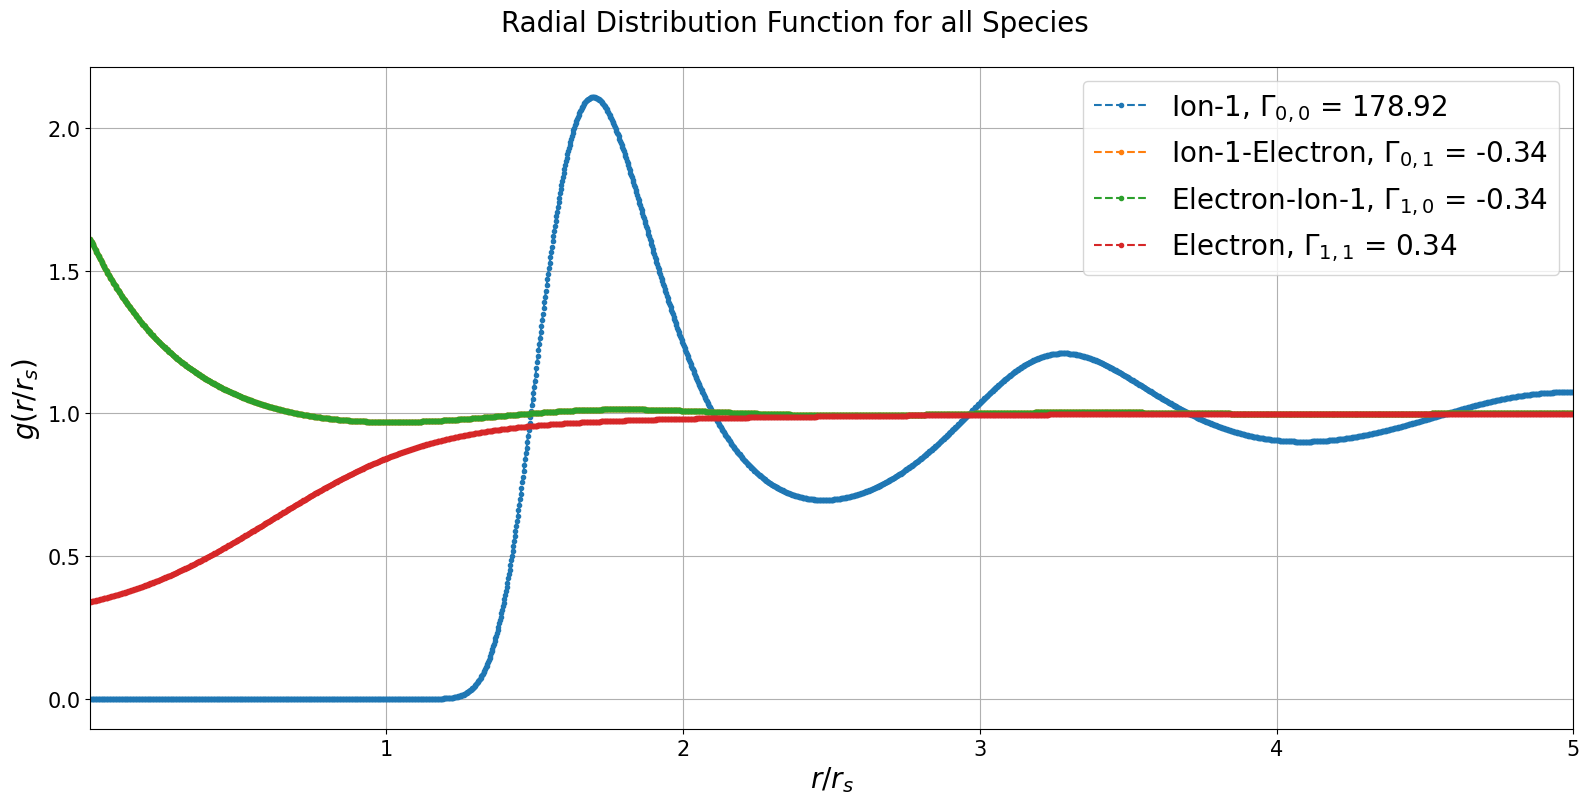

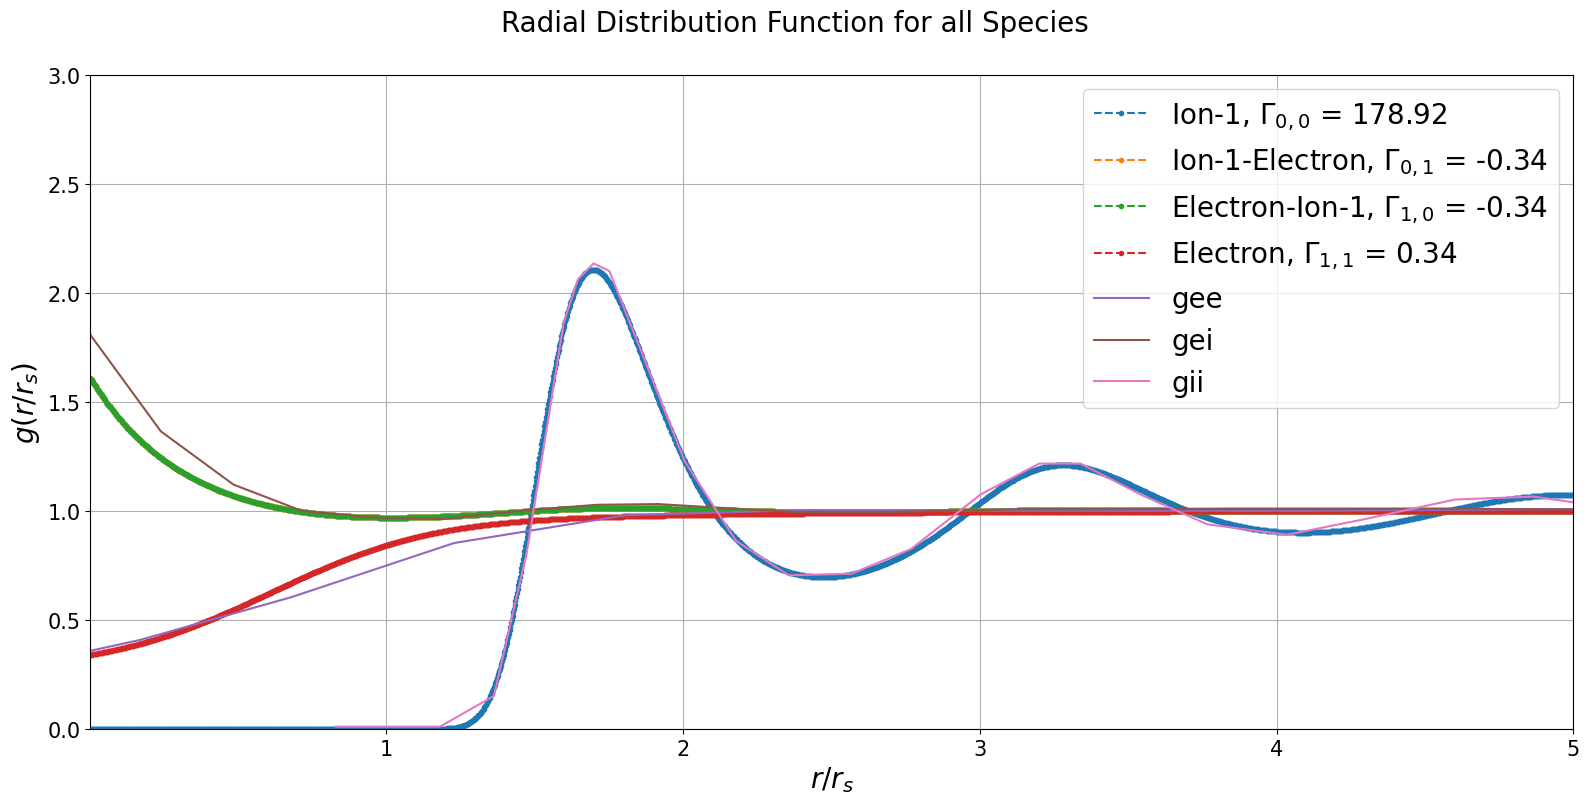

In [10]:
hnc2.plot_g_all_species()
hnc2.plot_g_all_species(gmax=3,data_to_compare=data_files, data_names=labels)


In [11]:
N_species = 1
Gamma = np.array(  [[qsp.Γii]])


names = ["Ion-1" ] 
kappa = 1
rho = np.array([  3/(4*np.pi)])
hnc1 = HNC_solver(N_species, Gamma=Gamma, kappa=kappa, tol=1e-6,
                 kappa_multiscale=1, rho = rho, num_iterations=int(1e0), 
                 R_max=5, N_bins=2000, names=names, dst_type=3)
βu_r_matrix = np.array([[qsp.βvii(hnc1.r_array)]])

hnc1.set_βu_matrix(βu_r_matrix)
# hnc1.initialize_guess()
hnc1.initialize_c_k()
hnc1.set_C_matrix()
hnc1.num_iterations=1e3
hnc1.HNC_solve(alpha_method='best', alpha_Picard = 1e-1, alpha_oz = 1e-4, h_max=1e4)


 HNC min: [0.5] True Optimization terminated successfully.
0: Err in c_r: 9.04e+02, OZ: 2.55e-01, HNC: 1.06e-02
 HNC min: [0.5] True Optimization terminated successfully.
1: Err in c_r: 4.86e+02, OZ: 2.39e-01, HNC: 4.14e-03
 HNC min: [0.5] True Optimization terminated successfully.
2: Err in c_r: 2.62e+02, OZ: 2.24e-01, HNC: 1.88e-02
 HNC min: [0.5] True Optimization terminated successfully.
3: Err in c_r: 1.44e+02, OZ: 2.09e-01, HNC: 5.45e-01
 HNC min: [0.5] True Optimization terminated successfully.
4: Err in c_r: 8.09e+01, OZ: 1.94e-01, HNC: 6.09e+00
 HNC min: [0.5] True Optimization terminated successfully.
5: Err in c_r: 4.78e+01, OZ: 1.84e-01, HNC: 6.23e+00
 HNC min: [0.5] True Optimization terminated successfully.
6: Err in c_r: 3.01e+01, OZ: 1.74e-01, HNC: 1.83e+01
 HNC min: [0.5] True Optimization terminated successfully.
7: Err in c_r: 2.06e+01, OZ: 1.69e-01, HNC: 9.36e+00
 HNC min: [0.5] True Optimization terminated successfully.
8: Err in c_r: 1.52e+01, OZ: 1.61e-01, HNC: 2

 HNC min: [0.5] True Optimization terminated successfully.
76: Err in c_r: 4.78e-01, OZ: 1.69e-01, HNC: 2.17e-02
 HNC min: [0.5] True Optimization terminated successfully.
77: Err in c_r: 4.68e-01, OZ: 1.69e-01, HNC: 2.09e-02
 HNC min: [0.5] True Optimization terminated successfully.
78: Err in c_r: 4.57e-01, OZ: 1.70e-01, HNC: 2.02e-02
 HNC min: [0.5] True Optimization terminated successfully.
79: Err in c_r: 4.47e-01, OZ: 1.71e-01, HNC: 1.96e-02
 HNC min: [0.5] True Optimization terminated successfully.
80: Err in c_r: 4.37e-01, OZ: 1.72e-01, HNC: 1.89e-02
 HNC min: [0.5] True Optimization terminated successfully.
81: Err in c_r: 4.27e-01, OZ: 1.72e-01, HNC: 1.83e-02
 HNC min: [0.5] True Optimization terminated successfully.
82: Err in c_r: 4.18e-01, OZ: 1.73e-01, HNC: 1.77e-02
 HNC min: [0.5] True Optimization terminated successfully.
83: Err in c_r: 4.08e-01, OZ: 1.74e-01, HNC: 1.71e-02
 HNC min: [0.5] True Optimization terminated successfully.
84: Err in c_r: 4.00e-01, OZ: 1.75e-0

 HNC min: [0.5] True Optimization terminated successfully.
153: Err in c_r: 1.14e-01, OZ: 2.15e-01, HNC: 3.01e-03
 HNC min: [0.5] True Optimization terminated successfully.
154: Err in c_r: 1.12e-01, OZ: 2.15e-01, HNC: 2.95e-03
 HNC min: [0.5] True Optimization terminated successfully.
155: Err in c_r: 1.10e-01, OZ: 2.16e-01, HNC: 2.90e-03
 HNC min: [0.5] True Optimization terminated successfully.
156: Err in c_r: 1.09e-01, OZ: 2.16e-01, HNC: 2.85e-03
 HNC min: [0.5] True Optimization terminated successfully.
157: Err in c_r: 1.07e-01, OZ: 2.16e-01, HNC: 2.80e-03
 HNC min: [0.5] True Optimization terminated successfully.
158: Err in c_r: 1.05e-01, OZ: 2.17e-01, HNC: 2.75e-03
 HNC min: [0.5] True Optimization terminated successfully.
159: Err in c_r: 1.04e-01, OZ: 2.17e-01, HNC: 2.71e-03
 HNC min: [0.5] True Optimization terminated successfully.
160: Err in c_r: 1.02e-01, OZ: 2.17e-01, HNC: 2.66e-03
 HNC min: [0.5] True Optimization terminated successfully.
161: Err in c_r: 1.00e-01, OZ

 HNC min: [0.5] True Optimization terminated successfully.
227: Err in c_r: 3.34e-02, OZ: 2.29e-01, HNC: 9.11e-04
 HNC min: [0.5] True Optimization terminated successfully.
228: Err in c_r: 3.28e-02, OZ: 2.29e-01, HNC: 8.95e-04
 HNC min: [0.5] True Optimization terminated successfully.
229: Err in c_r: 3.23e-02, OZ: 2.30e-01, HNC: 8.80e-04
 HNC min: [0.5] True Optimization terminated successfully.
230: Err in c_r: 3.17e-02, OZ: 2.30e-01, HNC: 8.64e-04
 HNC min: [0.5] True Optimization terminated successfully.
231: Err in c_r: 3.12e-02, OZ: 2.30e-01, HNC: 8.49e-04
 HNC min: [0.5] True Optimization terminated successfully.
232: Err in c_r: 3.07e-02, OZ: 2.30e-01, HNC: 8.35e-04
 HNC min: [0.5] True Optimization terminated successfully.
233: Err in c_r: 3.02e-02, OZ: 2.30e-01, HNC: 8.20e-04
 HNC min: [0.5] True Optimization terminated successfully.
234: Err in c_r: 2.97e-02, OZ: 2.30e-01, HNC: 8.06e-04
 HNC min: [0.5] True Optimization terminated successfully.
235: Err in c_r: 2.92e-02, OZ

 HNC min: [0.5] True Optimization terminated successfully.
301: Err in c_r: 1.02e-02, OZ: 2.38e-01, HNC: 2.63e-04
 HNC min: [0.5] True Optimization terminated successfully.
302: Err in c_r: 1.01e-02, OZ: 2.38e-01, HNC: 2.59e-04
 HNC min: [0.5] True Optimization terminated successfully.
303: Err in c_r: 9.93e-03, OZ: 2.38e-01, HNC: 2.55e-04
 HNC min: [0.5] True Optimization terminated successfully.
304: Err in c_r: 9.78e-03, OZ: 2.38e-01, HNC: 2.51e-04
 HNC min: [0.5] True Optimization terminated successfully.
305: Err in c_r: 9.63e-03, OZ: 2.38e-01, HNC: 2.47e-04
 HNC min: [0.5] True Optimization terminated successfully.
306: Err in c_r: 9.48e-03, OZ: 2.39e-01, HNC: 2.43e-04
 HNC min: [0.5] True Optimization terminated successfully.
307: Err in c_r: 9.34e-03, OZ: 2.39e-01, HNC: 2.39e-04
 HNC min: [0.5] True Optimization terminated successfully.
308: Err in c_r: 9.20e-03, OZ: 2.39e-01, HNC: 2.36e-04
 HNC min: [0.5] True Optimization terminated successfully.
309: Err in c_r: 9.06e-03, OZ

 HNC min: [0.5] True Optimization terminated successfully.
376: Err in c_r: 3.35e-03, OZ: 2.42e-01, HNC: 8.36e-05
 HNC min: [0.5] True Optimization terminated successfully.
377: Err in c_r: 3.31e-03, OZ: 2.42e-01, HNC: 8.24e-05
 HNC min: [0.5] True Optimization terminated successfully.
378: Err in c_r: 3.26e-03, OZ: 2.42e-01, HNC: 8.12e-05
 HNC min: [0.5] True Optimization terminated successfully.
379: Err in c_r: 3.21e-03, OZ: 2.42e-01, HNC: 8.00e-05
 HNC min: [0.5] True Optimization terminated successfully.
380: Err in c_r: 3.16e-03, OZ: 2.42e-01, HNC: 7.88e-05
 HNC min: [0.5] True Optimization terminated successfully.
381: Err in c_r: 3.12e-03, OZ: 2.42e-01, HNC: 7.77e-05
 HNC min: [0.5] True Optimization terminated successfully.
382: Err in c_r: 3.07e-03, OZ: 2.42e-01, HNC: 7.65e-05
 HNC min: [0.5] True Optimization terminated successfully.
383: Err in c_r: 3.03e-03, OZ: 2.42e-01, HNC: 7.54e-05
 HNC min: [0.5] True Optimization terminated successfully.
384: Err in c_r: 2.99e-03, OZ

 HNC min: [0.5] True Optimization terminated successfully.
452: Err in c_r: 1.12e-03, OZ: 2.43e-01, HNC: 2.75e-05
 HNC min: [0.5] True Optimization terminated successfully.
453: Err in c_r: 1.10e-03, OZ: 2.43e-01, HNC: 2.71e-05
 HNC min: [0.5] True Optimization terminated successfully.
454: Err in c_r: 1.09e-03, OZ: 2.43e-01, HNC: 2.68e-05
 HNC min: [0.5] True Optimization terminated successfully.
455: Err in c_r: 1.07e-03, OZ: 2.43e-01, HNC: 2.64e-05
 HNC min: [0.5] True Optimization terminated successfully.
456: Err in c_r: 1.05e-03, OZ: 2.43e-01, HNC: 2.60e-05
 HNC min: [0.5] True Optimization terminated successfully.
457: Err in c_r: 1.04e-03, OZ: 2.43e-01, HNC: 2.56e-05
 HNC min: [0.5] True Optimization terminated successfully.
458: Err in c_r: 1.02e-03, OZ: 2.43e-01, HNC: 2.53e-05
 HNC min: [0.5] True Optimization terminated successfully.
459: Err in c_r: 1.01e-03, OZ: 2.43e-01, HNC: 2.49e-05
 HNC min: [0.5] True Optimization terminated successfully.
460: Err in c_r: 9.96e-04, OZ

 HNC min: [0.5] True Optimization terminated successfully.
524: Err in c_r: 3.98e-04, OZ: 2.43e-01, HNC: 9.78e-06
 HNC min: [0.5] True Optimization terminated successfully.
525: Err in c_r: 3.92e-04, OZ: 2.43e-01, HNC: 9.64e-06
 HNC min: [0.5] True Optimization terminated successfully.
526: Err in c_r: 3.87e-04, OZ: 2.43e-01, HNC: 9.50e-06
 HNC min: [0.5] True Optimization terminated successfully.
527: Err in c_r: 3.81e-04, OZ: 2.43e-01, HNC: 9.36e-06
 HNC min: [0.5] True Optimization terminated successfully.
528: Err in c_r: 3.76e-04, OZ: 2.43e-01, HNC: 9.23e-06
 HNC min: [0.5] True Optimization terminated successfully.
529: Err in c_r: 3.71e-04, OZ: 2.43e-01, HNC: 9.10e-06
 HNC min: [0.5] True Optimization terminated successfully.
530: Err in c_r: 3.65e-04, OZ: 2.43e-01, HNC: 8.97e-06
 HNC min: [0.5] True Optimization terminated successfully.
531: Err in c_r: 3.60e-04, OZ: 2.43e-01, HNC: 8.84e-06
 HNC min: [0.5] True Optimization terminated successfully.
532: Err in c_r: 3.55e-04, OZ

 HNC min: [0.5] True Optimization terminated successfully.
597: Err in c_r: 1.40e-04, OZ: 2.43e-01, HNC: 3.44e-06
 HNC min: [0.5] True Optimization terminated successfully.
598: Err in c_r: 1.38e-04, OZ: 2.43e-01, HNC: 3.39e-06
 HNC min: [0.5] True Optimization terminated successfully.
599: Err in c_r: 1.36e-04, OZ: 2.43e-01, HNC: 3.34e-06
 HNC min: [0.5] True Optimization terminated successfully.
600: Err in c_r: 1.34e-04, OZ: 2.43e-01, HNC: 3.30e-06
 HNC min: [0.5] True Optimization terminated successfully.
601: Err in c_r: 1.32e-04, OZ: 2.43e-01, HNC: 3.25e-06
 HNC min: [0.5] True Optimization terminated successfully.
602: Err in c_r: 1.31e-04, OZ: 2.43e-01, HNC: 3.20e-06
 HNC min: [0.5] True Optimization terminated successfully.
603: Err in c_r: 1.29e-04, OZ: 2.43e-01, HNC: 3.16e-06
 HNC min: [0.5] True Optimization terminated successfully.
604: Err in c_r: 1.27e-04, OZ: 2.43e-01, HNC: 3.11e-06
 HNC min: [0.5] True Optimization terminated successfully.
605: Err in c_r: 1.25e-04, OZ

 HNC min: [0.5] True Optimization terminated successfully.
669: Err in c_r: 5.02e-05, OZ: 2.43e-01, HNC: 1.23e-06
 HNC min: [0.5] True Optimization terminated successfully.
670: Err in c_r: 4.95e-05, OZ: 2.43e-01, HNC: 1.21e-06
 HNC min: [0.5] True Optimization terminated successfully.
671: Err in c_r: 4.88e-05, OZ: 2.43e-01, HNC: 1.20e-06
 HNC min: [0.5] True Optimization terminated successfully.
672: Err in c_r: 4.81e-05, OZ: 2.43e-01, HNC: 1.18e-06
 HNC min: [0.5] True Optimization terminated successfully.
673: Err in c_r: 4.74e-05, OZ: 2.43e-01, HNC: 1.16e-06
 HNC min: [0.5] True Optimization terminated successfully.
674: Err in c_r: 4.67e-05, OZ: 2.43e-01, HNC: 1.15e-06
 HNC min: [0.5] True Optimization terminated successfully.
675: Err in c_r: 4.61e-05, OZ: 2.43e-01, HNC: 1.13e-06
 HNC min: [0.5] True Optimization terminated successfully.
676: Err in c_r: 4.54e-05, OZ: 2.43e-01, HNC: 1.11e-06
 HNC min: [0.5] True Optimization terminated successfully.
677: Err in c_r: 4.48e-05, OZ

 HNC min: [0.5] True Optimization terminated successfully.
744: Err in c_r: 1.72e-05, OZ: 2.43e-01, HNC: 4.22e-07
 HNC min: [0.5] True Optimization terminated successfully.
745: Err in c_r: 1.70e-05, OZ: 2.43e-01, HNC: 4.16e-07
 HNC min: [0.5] True Optimization terminated successfully.
746: Err in c_r: 1.67e-05, OZ: 2.43e-01, HNC: 4.10e-07
 HNC min: [0.5] True Optimization terminated successfully.
747: Err in c_r: 1.65e-05, OZ: 2.43e-01, HNC: 4.04e-07
 HNC min: [0.5] True Optimization terminated successfully.
748: Err in c_r: 1.63e-05, OZ: 2.43e-01, HNC: 3.99e-07
 HNC min: [0.5] True Optimization terminated successfully.
749: Err in c_r: 1.60e-05, OZ: 2.43e-01, HNC: 3.93e-07
 HNC min: [0.5] True Optimization terminated successfully.
750: Err in c_r: 1.58e-05, OZ: 2.43e-01, HNC: 3.87e-07
 HNC min: [0.5] True Optimization terminated successfully.
751: Err in c_r: 1.56e-05, OZ: 2.43e-01, HNC: 3.82e-07
 HNC min: [0.5] True Optimization terminated successfully.
752: Err in c_r: 1.54e-05, OZ

 HNC min: [0.5] True Optimization terminated successfully.
817: Err in c_r: 6.08e-06, OZ: 2.43e-01, HNC: 1.49e-07
 HNC min: [0.5] True Optimization terminated successfully.
818: Err in c_r: 5.99e-06, OZ: 2.43e-01, HNC: 1.47e-07
 HNC min: [0.5] True Optimization terminated successfully.
819: Err in c_r: 5.91e-06, OZ: 2.43e-01, HNC: 1.45e-07
 HNC min: [0.5] True Optimization terminated successfully.
820: Err in c_r: 5.83e-06, OZ: 2.43e-01, HNC: 1.43e-07
 HNC min: [0.5] True Optimization terminated successfully.
821: Err in c_r: 5.74e-06, OZ: 2.43e-01, HNC: 1.41e-07
 HNC min: [0.5] True Optimization terminated successfully.
822: Err in c_r: 5.66e-06, OZ: 2.43e-01, HNC: 1.39e-07
 HNC min: [0.5] True Optimization terminated successfully.
823: Err in c_r: 5.58e-06, OZ: 2.43e-01, HNC: 1.37e-07
 HNC min: [0.5] True Optimization terminated successfully.
824: Err in c_r: 5.50e-06, OZ: 2.43e-01, HNC: 1.35e-07
 HNC min: [0.5] True Optimization terminated successfully.
825: Err in c_r: 5.42e-06, OZ

 HNC min: [0.5] True Optimization terminated successfully.
893: Err in c_r: 2.06e-06, OZ: 2.43e-01, HNC: 5.04e-08
 HNC min: [0.5] True Optimization terminated successfully.
894: Err in c_r: 2.03e-06, OZ: 2.43e-01, HNC: 4.97e-08
 HNC min: [0.5] True Optimization terminated successfully.
895: Err in c_r: 2.00e-06, OZ: 2.43e-01, HNC: 4.90e-08
 HNC min: [0.5] True Optimization terminated successfully.
896: Err in c_r: 1.97e-06, OZ: 2.43e-01, HNC: 4.83e-08
 HNC min: [0.5] True Optimization terminated successfully.
897: Err in c_r: 1.94e-06, OZ: 2.43e-01, HNC: 4.76e-08
 HNC min: [0.5] True Optimization terminated successfully.
898: Err in c_r: 1.92e-06, OZ: 2.43e-01, HNC: 4.69e-08
 HNC min: [0.5] True Optimization terminated successfully.
899: Err in c_r: 1.89e-06, OZ: 2.43e-01, HNC: 4.63e-08
 HNC min: [0.5] True Optimization terminated successfully.
900: Err in c_r: 1.86e-06, OZ: 2.43e-01, HNC: 4.56e-08
 HNC min: [0.5] True Optimization terminated successfully.
901: Err in c_r: 1.83e-06, OZ

In [12]:
qsp.Tq, qsp.Te, qsp.Te_c

(6.605720958493223, 0.012495408, 6.605732776664351)

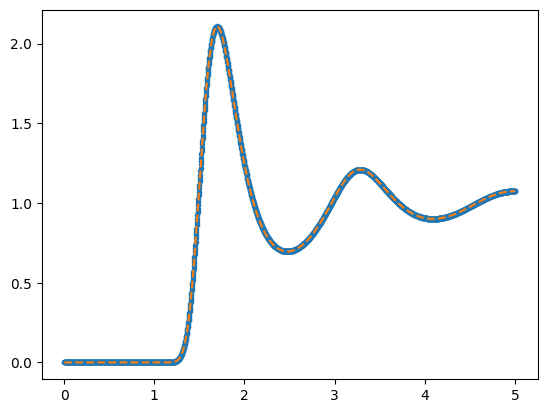

In [13]:
fig, ax = plt.subplots()

ax.plot(hnc2.r_array, hnc2.h_r_matrix[0,0]+1,'.')
ax.plot(hnc1.r_array, hnc1.h_r_matrix[0,0]+1, '--')